In [0]:
import os
import pandas as pd
import numpy as np
import json
from google.colab import files
import io
from keras import layers
from keras import models
from keras import applications
from keras import optimizers
import keras
import tensorflow as tf

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def predict(path,f):

    #path='/content/drive/My Drive/Training/v10.json'
    #path='/content/1'
    json_files=[pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]
    print('Found: ',len(json_files),'json keypoint frame files')
    a=json.load(open(path+'/'+json_files[0]))
    b=a['people']
    q=b[0]['pose_keypoints_2d']
    s=[p for p in q if p>1]
    train=pd.DataFrame([s])
    for j in range(1,len(json_files)):
        a=json.load(open(path+'/'+json_files[j]))
        b=a['people']
        if len(b)>0:
            q=b[0]['pose_keypoints_2d']
            s=[p for p in q if p>1]
            s=pd.DataFrame([s])
            train=train.append(s)
        else:
            continue

    train=train.fillna(method='ffill')
    train=train.fillna(0)
    y,x=train.shape
    s=np.zeros(y)
    s=pd.DataFrame(s)

    for i in range(50):
        y,x=train.shape
        if x!=50:
            train[x]=s
            x=x+1
        if y<90:
            train=train.append(train.iloc[y-1])

    for i in range(50):
        train.iloc[:,i]=train.iloc[:,i]/train.iloc[:,i].max()

    train=train.fillna(method='ffill')
    train=train.fillna(0)
    train.head()
    x,y=train.shape
    train=train.iloc[:90*int(x/90),:30]
    train=train.values
    train=train.reshape(int(x/90),90,30)
    #model.load_weights('/content/weights11.221-0.96.hdf5')
    model=tf.keras.models.load_model('/content/weights21.340-0.93-90-30.hdf5')
    y=model.predict(train)
    y=y.flatten()
    model=tf.keras.models.load_model('/content/weights11.296-0.95-90-15-lfp-bi.hdf5')
    y1=model.predict(train)
    y1=y1.flatten()
    y2=y1*0.2+0.8*y
    import statistics
    t1=[]
    for i in range(60):
        t1.append(statistics.mean(y2[i*30:(i+1)*30]))

    import matplotlib.pyplot as plt 
    plt.ylim(-0.5,1.5)
    plt.plot(t1)
    plt.xlabel('time')
    plt.ylabel('action')
    s=[]
    for i in range(len(t1)):
        s.append([i,float(t1[i])])
    q=json.dumps(s)
    with open('../content/929004194 Timelabelvideo'+str(f)+'.json','w') as outfile:
        outfile.write(q)
    #plt.xticks(np.arange(0,60,1)


Found:  1820 json keypoint frame files


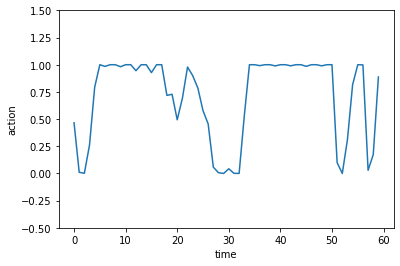

In [126]:
path='/content/drive/My Drive/Training/v2.json'
predict(path)

Found:  3624 json keypoint frame files


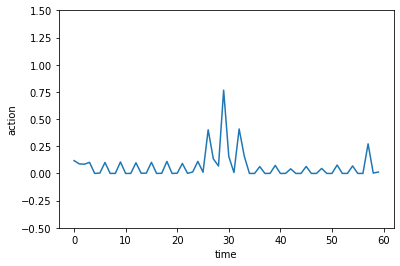

In [131]:
path='/content/drive/My Drive/Training/v7.json'
predict(path)

Found:  1817 json keypoint frame files


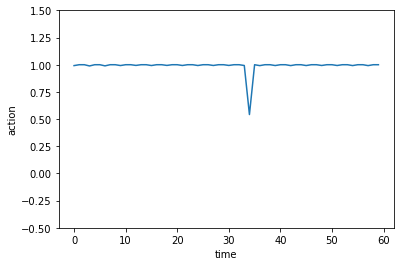

In [171]:
path='/content/drive/My Drive/Training/v8.json'
predict(path,4)

Found:  1830 json keypoint frame files


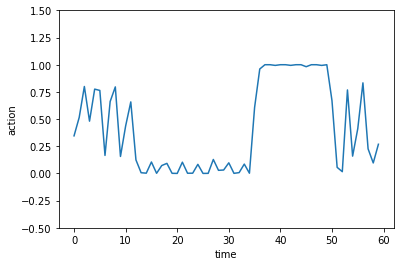

In [172]:
path='/content/drive/My Drive/Training/v10.json'
predict(path,5)